#３体問題の２体問題への分解

QUBOでは通常２体問題と呼ばれる２つの量子ビットの掛け算までしか計算できません。しかし、時々問題を作っている際に、３量子ビット以上の掛け算が出ることがあります。その際には数学的なテクニックを利用して３体問題を２体問題に分解をします。

##２体問題の解き方
例えば下記のようなコスト関数がある時には、そのままその係数をQUBOで計算できます。これは、q0のバイアスとq0,q1間の結合係数を上三角行列で表すことで実現できます。詳しくは他のチュートリアルを参考にしてください。


<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E =q_0-q_0q_1&amp;mode=inline">

In [7]:
import wildqat as wq
a = wq.opt()
a.qubo = [[1,-1],[0,0]]
a.sa()

1.5159461498260498


[0, 0]

##３体問題の解き方
では、３体問題という量子ビットが複数掛け算されているものはどうでしょうか？
結合係数は２量子ビット同士の係数しかないので、そのままでは設定できません。

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E%3Dq_0-q_0q_1q_2">

そこで、今回はこの３体問題を数学的に２体問題に分解します。

##分解方法
分解に際して新しい量子ビットを追加します。下記のように新しい量子ビットを加えて、表現します。

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=q_1q_2%20%3D%20q_3">

ただ、置き換えただけではなく、上記条件を満たすための新しい拘束条件を式の最後に付け加えます。

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E%3Dq_0-q_0q_3%20%2B%20%5Cdelta(3q_3%2Bq_1q_2-2q_1q_3-2q_2q_3)">

係数のガンマはその時々によって調整するハイパーパラメータです。ここではガンマを0.5にしてみると下記のようになり、

<img class="math matn-inline" src="https://render.githubusercontent.com/render/math?math=E%20%3D%20q_0-q_0q_3%2B1.5q_3%2B0.5q_1q_2-q_1q_3-q_2q_3">

これを計算にかけると、

In [12]:
b = wq.opt()
b.qubo = [[1,0,0,-1],[0,0,0.5,-1],[0,0,0,-1],[0,0,0,1.5]]
b.sa()

1.5440006256103516


[1, 1, 1, 1]

実際に、これは条件を満たしています。

<img class="math matn-inline" src="https://render.githubusercontent.com/render/math?math=q_0*q_2%20%3D%201*1%20%3D%201%20%3D%20q_3">

全体のエネルギーの遷移はmatplotlibを用いて確認することができて下記のようになります。

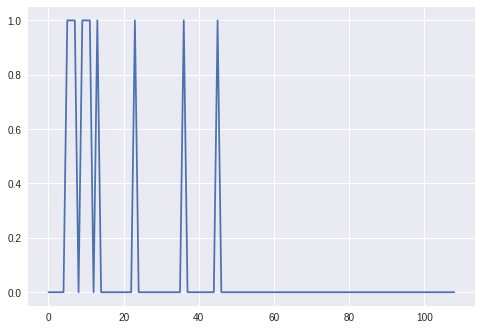

In [8]:
a.plot()